## Homework - Machine Learning Preparation
### Agi Rahmawandi <br> Batch 57



In [33]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler


print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  2.2.5
pandas version :  2.2.3
seaborn version :  0.13.2



**Product Classification**<br>
**Deskripsi**<br>
* Memprediksi apakah suatu produk eksklusif atau tidak berdasarkan fitur yang tersedia<br>


In [34]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

### Load data

In [35]:
df = pd.read_csv('./dataset/Product_Exclusive_Classification.csv')

## Exploratory Data Analysis (EDA)

## Pendekatan Numerik
## 1. Descriptive Statistics

Gunakan function info dan describe pada dataset final project kalian. Tuliskan hasil
observasinya, seperti:<br>
A. Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya
kurang sesuai?<br>
B. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja?<br>
C. Apakah ada kolom yang memiliki nilai summary agak aneh?<br>
(min/mean/median/max/unique/top/freq)<br>
* Untuk masing-masing jenis observasi, tuliskan juga jika tidak ada masalah,
misal untuk A: “Semua tipe data sudah sesuai”

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8000 non-null   int64  
 1   brand              8000 non-null   object 
 2   category           7987 non-null   object 
 3   rating             7905 non-null   float64
 4   number_of_reviews  7991 non-null   float64
 5   love               7966 non-null   float64
 6   price              7992 non-null   float64
 7   value_price        7983 non-null   float64
 8   exclusive          8000 non-null   int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 562.6+ KB


In [36]:
## pengelompokan berdasar jenis kolom
cats = ['brand','category']
numbs = ['rating','number_of_reviews','love','price','value_price','id','exclusive']


In [ ]:
df[cats].describe()

,brand,category
count,8000,7987
unique,310,142
top,SEPHORA COLLECTION,Perfume
freq,492,619


In [5]:
df[numbs].describe()

,rating,number_of_reviews,love,price,value_price
count,7905.000000,7991.000000,7.966000e+03,7992.000000,7983.000000
mean,4.085136,303.574396,1.756396e+04,49.900935,50.983300
std,0.761069,931.724460,4.425339e+04,46.864764,48.473049
min,0.000000,0.000000,0.000000e+00,2.000000,2.000000
25%,4.000000,14.000000,2.000000e+03,24.000000,24.000000
50%,4.000000,56.000000,5.500000e+03,35.000000,35.000000
75%,4.500000,231.500000,1.530000e+04,59.000000,60.000000
max,5.000000,19000.000000,1.300000e+06,549.000000,549.000000


In [7]:
df.isna().sum()

id                    0
brand                 0
category             13
rating               95
number_of_reviews     9
love                 34
price                 8
value_price          17
exclusive             0
dtype: int64

In [ ]:
df.sample(3)

,id,brand,category,rating,number_of_reviews,love,price,value_price,exclusive
1178,1589118,Fresh,Moisturizers,4.0,NaN,11900.0,90.0,90.0,0
5641,2162493,dyson,Hair Straighteners & Flat Irons,4.0,496.0,50400.0,549.0,549.0,0
551,1284249,Armani Beauty,Perfume,4.5,921.0,30300.0,78.0,78.0,0


A. Type data dan nama kolom sudah sesuai <br>
- int64: id, exclusive
- float64: rating, number_of_reviews, love, price, value_price
- object: brand, category<br>

B. kolom yang memiliki nilai kosong adalah category,rating, number_of_reviews,love,price,value_price<br>
C. Terdapat beberapa kolom yang memiliki summary yang dirasa kurang tepat.
- kolom love mempunyai nilai`max 1.300.000` ke  nilai `mean 17.563` maupun ke nilai `median 5.500` yang terlampau jauh,kemungkinan ada outlier 
- kolom number_of_reviews nilai `max 19000 `ke nilai`mean 303.57`maupun ke nilai `median 56` yang terlampau jauh,kemungkinan ada outlier 
- begitupun dengan kolom price dan price_value jarak nilai `max 549` ke median ataupun ke mean nya terlihat jauh, kemungkinan juga ada outlier

https://www.kaggle.com/code/mohammadfikri/product-exclusive-classification-roc-auc-87/notebook

## Pendekatan Grafis

## 2. Univariate Analysis
Gunakan visualisasi untuk melihat distribusi masing-masing kolom (feature maupun
target). <br>Tuliskan hasil observasinya, misalnya jika ada suatu kolom yang distribusinya
menarik (misal skewed, bimodal, ada outlier, ada nilai yang mendominasi, kategorinya
terlalu banyak, dsb).<br> Jelaskan juga apa yang harus di-follow up saat data pre-processing.

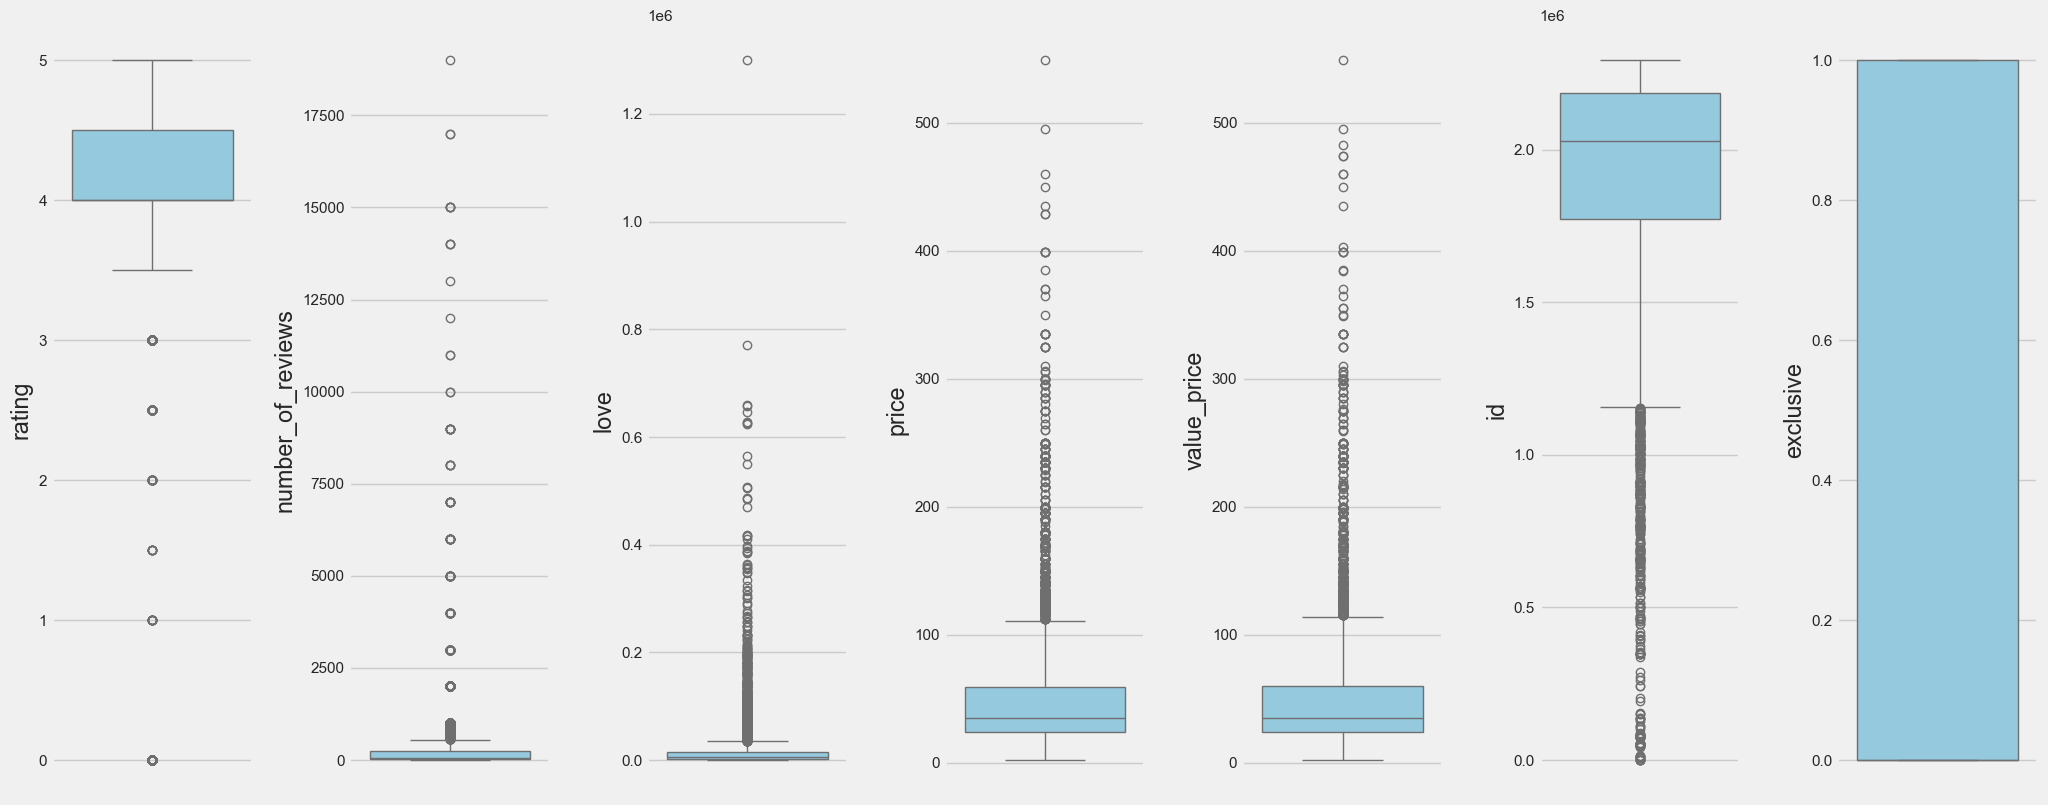

In [41]:

for i in range(len(numbs)):
    plt.subplot(1, len(numbs), i + 1)
    sns.boxplot(y=df[numbs[i]], color='skyblue')
    col_min = df[numbs[i]].min()
    col_max = df[numbs[i]].max()


plt.tight_layout()
plt.show()

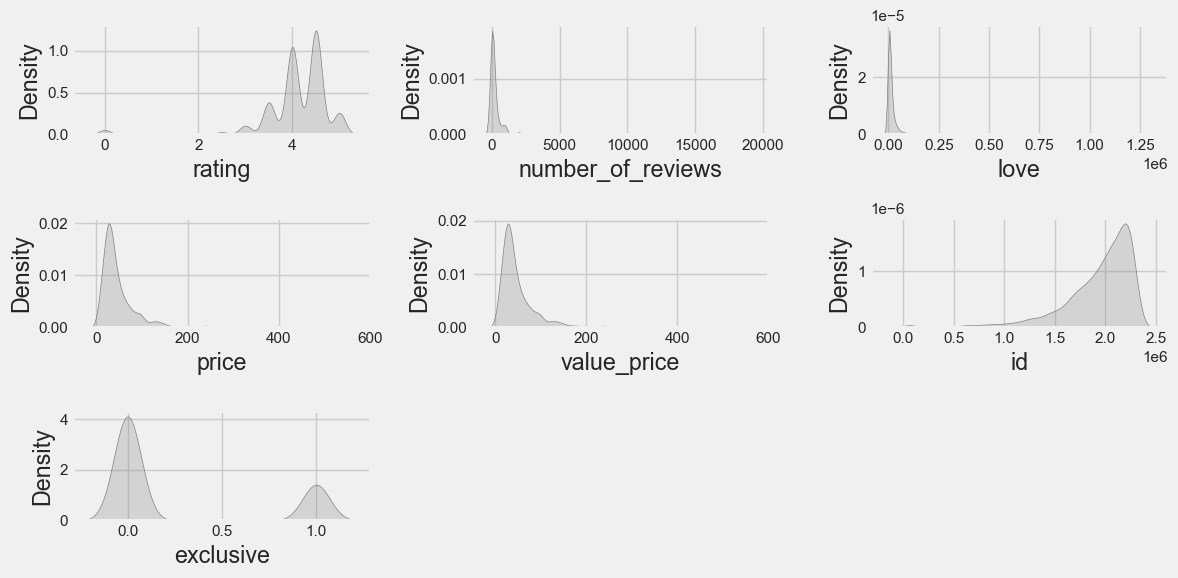

In [43]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 6))

# Flatten axes agar mudah diakses dengan index
axes = axes.flatten()

# Plot tiap kolom secara terpisah
for i, col in enumerate(numbs):
    sns.kdeplot(df[col], ax=axes[i], fill=True, color='gray')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')

# Nonaktifkan axes yang tidak terpakai (jika kolom < jumlah subplot)
for j in range(len(numbs), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

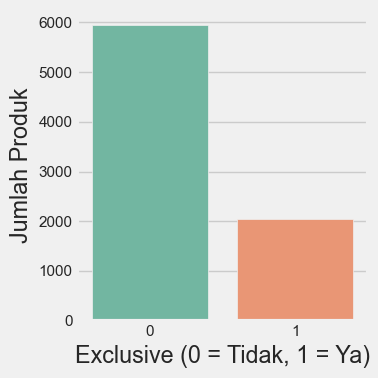

In [44]:
plt.figure(figsize=(4, 4))
sns.countplot(data=df, x='exclusive', palette='Set2')
plt.xlabel('Exclusive (0 = Tidak, 1 = Ya)')
plt.ylabel('Jumlah Produk')
plt.tight_layout()
plt.show()

In [45]:
df['exclusive'].value_counts()

exclusive
0    5953
1    2047
Name: count, dtype: int64

In [26]:
df[cats].describe()

,brand,category
count,8000,7987
unique,310,142
top,SEPHORA COLLECTION,Perfume
freq,492,619


Melihat bentuk distribusi data dari masing masing kolom :<br>
- Kolom rating, data berkumpul di rentang angka 3 sampai 5, karena ada nilai min 0, perlu di pertimbangkat apakah dihapus ataukan digunakan.
- Kolom `number_of_review, Love,Price,value_price` terlihat memiliki pola yang sama yakni bertumpuk dinilai kecil/ `skewed positif`, serta memiliki outlier yang cukup jauh.  Perlu dilakukan scaling dan handling outlier saat dara pre-processing
- Lalu pada kolom exclusive angka 0 (‘tidak’)  lebih banyak dari angka 1 (‘ya’) datanya imbalace, perlu penangan data imbalance dalam pre-processing.
- Lalu pada kolom berupa kategory, yakni kolom ‘brand’ dan ‘category’,  kategorinya terlalu banyak perlu dilakukan encoding


## 3. Multivariate Analysis (15 poin)
Lakukan multivariate analysis (seperti correlation heatmap dan category plots, sesuai yang
diajarkan di kelas). Tuliskan hasil observasinya, seperti: <br>
A. Bagaimana korelasi antara masing-masing feature dan label. Kira-kira feature mana
saja yang paling relevan dan harus dipertahankan?<br>
B. Bagaimana korelasi antar-feature, apakah ada pola yang menarik? Apa yang perlu
dilakukan terhadap feature itu?<br>
* Tuliskan juga jika memang tidak ada feature yang saling berkorelasi

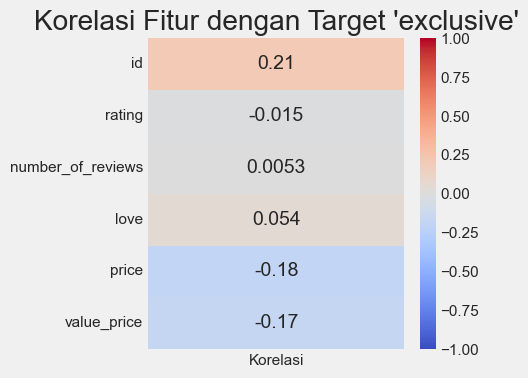

In [45]:
numerical_cols = df.select_dtypes(include=['float64', 'int64'])

# Hitung korelasi terhadap 'exclusive' dan ubah ke DataFrame (dengan kolom)
correlation_with_target = numerical_cols.corr()['exclusive'].drop('exclusive').to_frame()

# Optional: beri nama kolom agar lebih jelas
correlation_with_target.columns = ['Korelasi']

# Plot heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_with_target, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Korelasi Fitur dengan Target 'exclusive'")
plt.tight_layout()
plt.show()



<Axes: >

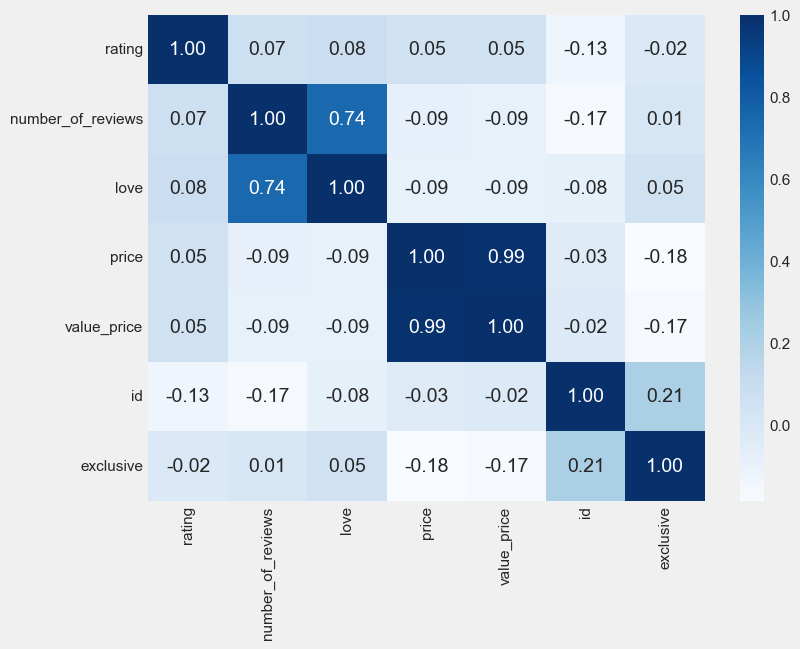

In [44]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[numbs].corr(), cmap='Blues', annot=True, fmt='.2f')

## Dari korelasi antar kolom kita bisa melihat bahwa :
- Kolom yang paling relevan dan dipertahankan ialah kolom `price` senilai -18 yang berkolerasi negatif.<br>
- `Value_price` redundan dengan kolom `price`, makan akan didrop..<br>
- Kolom `love` dan `number_of_reviews` redundan dan akan diambil salah satu..<br>
- Meski memilki nilai korelasi cukup besar kolom `id` akan di drop karena kolom id merupakan Identifier, bukan fitur..<br>


## 4. Data Cleansing (40 poin)
Lakukan pembersihan data, sesuai yang diajarkan di kelas, seperti:<br>
A. Handle missing values<br>
B. Handle duplicate data<br>
C. Handle outliers<br>
D. Feature transformation<br>
E. Feature encoding<br>
F. Handle class imbalance<br>
Di laporan homework, tuliskan apa saja yang telah dilakukan dan metode yang digunakan.<br>
* Tetap tuliskan jika memang ada tidak yang perlu di-handle (contoh: “Tidak perlu feature
encoding karena semua feature sudah numerical” atau “Outlier tidak di-handle karena akan
fokus menggunakan model yang robust terhadap outlier”).

### A. Missing Value 

In [5]:
df.sample(5)

,id,brand,category,rating,number_of_reviews,love,price,value_price,exclusive
2166,1797539,Givenchy,Lipstick,4.5,234.0,48900.0,34.0,34.0,0
2089,1784669,Briogeo,Leave-In Conditioner,4.0,425.0,17400.0,20.0,20.0,0
4266,2046613,Farmacy,Value & Gift Sets,4.5,130.0,35900.0,45.0,45.0,1
5503,2147338,By Rosie Jane,Lotions & Oils,4.5,6.0,484.0,40.0,40.0,0
1313,1638196,Atelier Cologne,Lotions & Oils,4.5,4.0,1100.0,60.0,60.0,0


In [48]:
df.isna().sum()

id                   0
brand                0
category             0
rating               0
number_of_reviews    0
love                 0
price                0
value_price          0
exclusive            0
dtype: int64

In [46]:
df['category'].fillna(df['category'].mode()[0],inplace=True)
df['rating'].fillna(df['rating'].mode()[0],inplace=True)
df['number_of_reviews'].fillna(df['number_of_reviews'].mode()[0],inplace=True)
df['love'].fillna(df['love'].mode()[0],inplace=True)
df['price'].fillna(df['price'].mean(),inplace=True)
df['value_price'] = df['value_price'].fillna(df['price'])

### B. Duplicate Values 


In [47]:
df.duplicated().sum()

np.int64(0)

### C. Outliers 

In [49]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')
numbs = ['rating','number_of_reviews','love','price','value_price']
filtered_entries = np.array([True] * len(df))
for col in numbs:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df[col] >= low_limit) & (df[col] <= high_limit)) & filtered_entries

df = df[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 8000
Jumlah baris setelah memfilter outlier: 5549


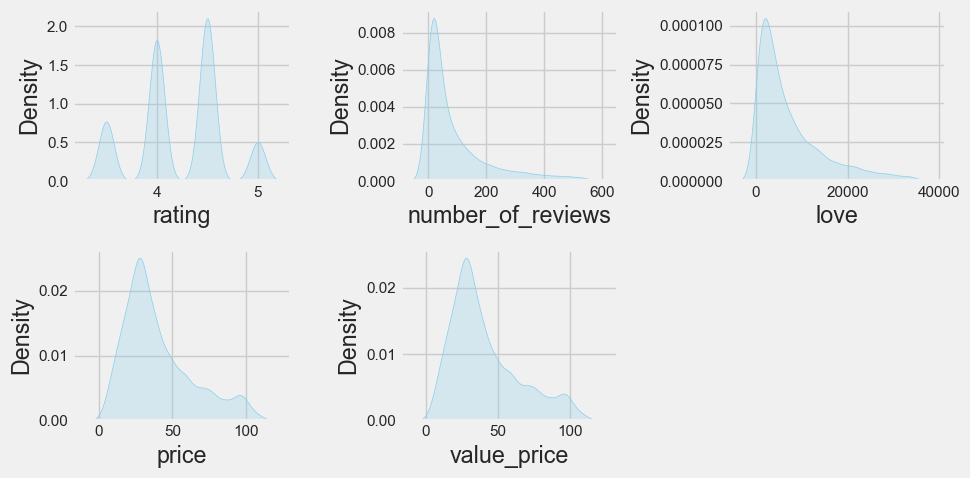

In [50]:
# Buat subplot: 1 kolom 5 baris (bisa disesuaikan)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 5))

# Flatten axes agar mudah diakses dengan index
axes = axes.flatten()

# Plot tiap kolom secara terpisah
for i, col in enumerate(numbs):
    sns.kdeplot(df[col], ax=axes[i], fill=True, color='skyblue')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')

# Nonaktifkan axes yang tidak terpakai (jika kolom < jumlah subplot)
for j in range(len(numbs), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

In [13]:
df.sample(3)

,id,brand,category,rating,number_of_reviews,love,price,value_price,exclusive
1678,1707835,tarte,Mascara,4.5,335.0,23500.0,22.0,22.0,0
4155,2038636,PINROSE,Perfume,4.5,13.0,3200.0,48.0,48.0,1
6393,2204170,COOLA,Body Sunscreen,4.5,205.0,2200.0,32.0,32.0,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5549 entries, 0 to 7998
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5549 non-null   int64  
 1   brand              5549 non-null   object 
 2   category           5549 non-null   object 
 3   rating             5549 non-null   float64
 4   number_of_reviews  5549 non-null   float64
 5   love               5549 non-null   float64
 6   price              5549 non-null   float64
 7   value_price        5549 non-null   float64
 8   exclusive          5549 non-null   int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 433.5+ KB


### D.Feature transformation


In [51]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Transformasi log dulu
df['price'] = np.log1p(df['price'])
df['love'] = np.log1p(df['love'])
df['number_of_reviews'] = np.log1p(df['number_of_reviews'])
df['value_price'] = np.log1p(df['value_price'])

# Kemudian scaling
scaler = StandardScaler()
df[['price', 'love', 'number_of_reviews','value_price']] = scaler.fit_transform(df[['price', 'love', 'number_of_reviews','value_price']])

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5549 entries, 0 to 7998
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5549 non-null   int64  
 1   brand              5549 non-null   object 
 2   category           5549 non-null   object 
 3   rating             5549 non-null   float64
 4   number_of_reviews  5549 non-null   float64
 5   love               5549 non-null   float64
 6   price              5549 non-null   float64
 7   value_price        5549 non-null   float64
 8   exclusive          5549 non-null   int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 433.5+ KB


In [17]:
df.sample()

,id,brand,category,rating,number_of_reviews,love,price,value_price,exclusive
6452,2206571,INC.redible,Moisturizers,3.5,-1.28511,-0.761315,-1.668853,12.0,0


Melakukan transformasi menggunakan logarithmic transformation pada fitur yang memiliki distribusi yang sangat miring ke kanan (skewed-positif) dan memiliki nilai ekstrim (outlier):<br>

Lalu untuk menyamakan skala dilakukan feature scaling menggunakan StandardScaler untuk menormalisasi fitur numerik menjadi distribusi dengan mean 0 dan standar deviasi 1.

### E. Feature encoding

In [53]:
df['brand_encoded'] = df.groupby('brand')['exclusive'].transform('mean')
df['category_encoded'] = df.groupby('category')['exclusive'].transform('mean')

df = df.drop('brand', axis=1)
df = df.drop('category', axis=1)

In [25]:
df.sample(5)

,id,brand,category,rating,number_of_reviews,love,price,value_price,exclusive,brand_encoded,category_encoded
5549,2152452,Viseart,Eye Palettes,4.5,-0.978732,0.404643,0.570407,0.573834,0,0.066667,0.521277
5569,2155471,Obagi Clinical,Moisturizers,4.5,0.560520,0.395466,0.711985,0.763123,1,0.857143,0.239852
190,765677,Anastasia Beverly Hills,Eye Brushes,4.5,0.720678,0.965089,NaN,-1.132602,0,0.125000,0.537500
3993,2030252,Fresh,Face Masks,4.5,1.060740,1.036336,0.843967,0.959853,0,0.067568,0.402597
4624,2075562,Dr Roebuck's,Face Serums,4.0,-0.110199,-0.454541,0.809173,0.905969,1,1.000000,0.317757


Tujuan penggunaan Target Encoding :<br>
High cardinality,dalam kolom banyak kategori dan akan menghasilkan banyak kolom.<br>
Tiap brand akan diganti dengan rata-rata nilai exclusive pada produk-produk brand tersebut.

### F. Handle class imbalance

In [54]:
df['exclusive'].value_counts(normalize=True)  # proporsi
df['exclusive'].value_counts()  

exclusive
0    4106
1    1443
Name: count, dtype: int64

In [55]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X = df.drop('exclusive', axis=1)
y = df['exclusive']

# Split data (opsional)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Terapkan SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print("Setelah SMOTE:")
print(y_resampled.value_counts())

Setelah SMOTE:
exclusive
0    3285
1    3285
Name: count, dtype: int64


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5549 entries, 0 to 7998
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5549 non-null   int64  
 1   rating             5549 non-null   float64
 2   number_of_reviews  4507 non-null   float64
 3   love               5131 non-null   float64
 4   price              4694 non-null   float64
 5   value_price        5549 non-null   float64
 6   exclusive          5549 non-null   int64  
 7   brand_encoded      5549 non-null   float64
 8   category_encoded   5549 non-null   float64
dtypes: float64(7), int64(2)
memory usage: 433.5 KB


Tager Exclusive bersifat imbalance `74% Tidak exclusive` dan `26% exclusive`. <br>
penanganan imbalance dilakukan menggunakan SMOTE (Synthetic Minority Over-sampling Technique) untuk menyeimbangkan jumlah sampel.

# 5. Feature Engineering (30 poin)
Cek feature yang ada sekarang, lalu lakukan:<br>
A. Feature selection (membuang feature yang kurang relevan atau redundan)<br>
B. Feature extraction (membuat feature baru dari feature yang sudah ada)<br>
C. Tuliskan minimal 4 feature tambahan (selain yang sudah tersedia di dataset) yang
mungkin akan sangat membantu membuat performansi model semakin bagus (ini hanya
ide saja, untuk menguji kreativitas teman-teman, tidak perlu benar-benar dicari datanya
dan tidak perlu diimplementasikan)<br>
* Untuk 5A & 5B, tetap tuliskan jika memang tidak bisa dilakukan (contoh: “Semua feature
digunakan untuk modelling (tidak ada yang dihapus), karena semua feature relevan”)<br>

### A. Feature selection

In [57]:
# Hitung korelasi semua kolom terhadap 'exclusive'
corr_matrix = df.corr(numeric_only=True)

# Ambil korelasi fitur terhadap target
feature_corr = corr_matrix['exclusive'].drop('exclusive').sort_values(ascending=False)

print(feature_corr)

brand_encoded        0.809607
category_encoded     0.373227
id                   0.223768
love                 0.054535
rating               0.007721
number_of_reviews   -0.000547
value_price         -0.218664
price               -0.232899
Name: exclusive, dtype: float64


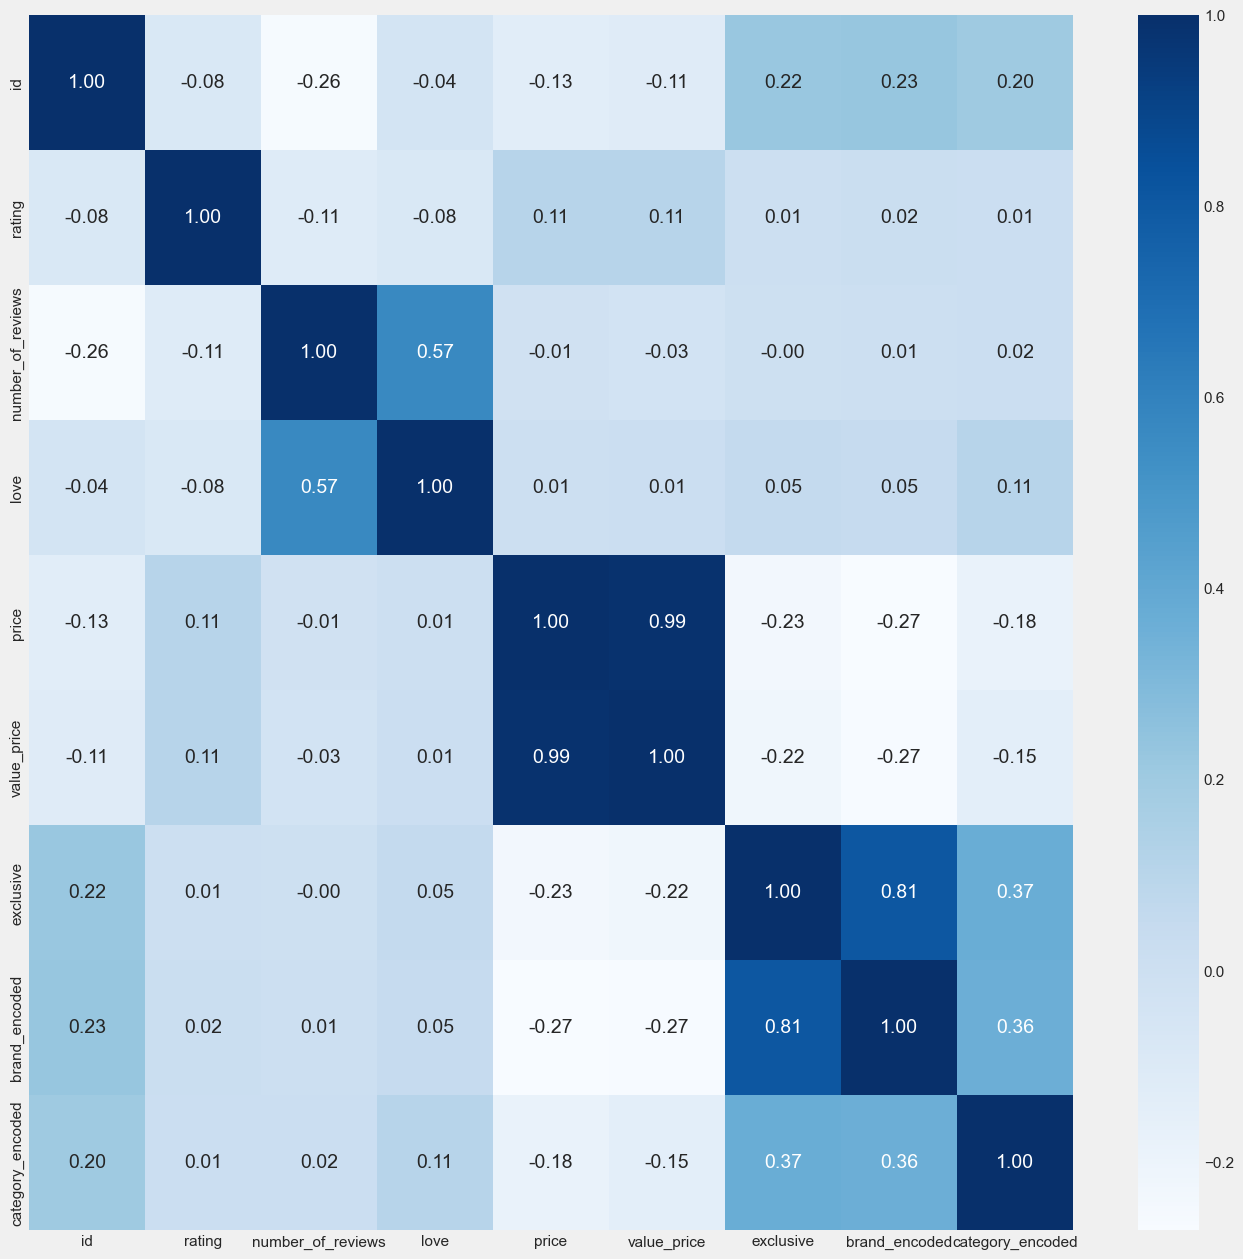

In [56]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')
plt.show()

### B. Feature extraction

### C. feature tambahan